# Analysis TItanic Dataset
In this Project we will be analyzing the Titanic Dataset to predict the survival of the passengers.
Here are the steps we will be taking:

## 1. Data Loading and Exploration
### - Summary statistics
### - Missing value analysis
### - Distribution analysis
### - Correlation analysis

## 2. Data Cleaning
### - Handle missing values
### - Deal with outliers
### - Fix inconsistent categories
### - Address data quality issues

## 3. Exploratory Data Analysis (EDA)
### - Univariate Analysis
### - Bivariate Analysis
### - Multivariate Analysis

## 4. Feature Engineering
### - Create age groups
### - Develop family size features
### - Extract title information
### - Create fare categories
### - Develop cabin location features

## 5. Model Building
### - Start with simple models
### - Progress to more complex models
### - Compare different approaches
### - Ensemble best performers

## 6. Model Evaluation
### - Evaluate model performance
### - Interpret model results
### - Compare different models

## 7. Conclusion


## Questions 
### 1. General Question
- What were the ship's evacuation protocols (women and children first)?

### 2. Data Understanding
- What was the age distribution?
- What was the average age of passengers?
- Did age affect survival rates?
- What was the gender ratio?
- Did gender affect survival rates?
- How many passengers were in each class?
- What was the average fare paid by passengers?
- Did fare affect survival rates?
- Where did most passengers embark from?
- How many families were traveling together?
- Did family size affect survival rates?
- Were there many solo travelers?

### 3. Data Quality Questions
- How much missing data is there?
- Are there any outliers?
- Which features have missing values?
- Are there any unusual patterns in the data? Is the data imbalanced?

### 4. Initial Data Analysis
- Overall survival rate
- Survival rate by gender
- Survival rate by class
- Survival rate by age group
- Survival rate by port of embarkation
- Which features strongly correlate with survival?
- Are there correlations between features?
- What indirect relationships might exist?

### 5. Feature Engineering Considerations

#### Title Analysis
- Can we extract titles from names?
- Do different titles indicate social status?

#### Family Information
- Can we create family groups?
- Can we identify traveling groups?
- Should we combine SibSp and Parch?

#### Location Information
- What can cabin numbers tell us?
- Does deck location matter?
- Are there patterns in ticket numbers?

### 5. Modeling Strategy Questions

#### Model Selection
- What type of problem is this (binary classification)?
- Which models work well with categorical data?
- How do we handle mixed numeric and categorical features?

#### Validation Strategy
- How should we split the data?
- What cross-validation approach is appropriate?
- What metrics should we use to evaluate performance?

### 6. Feature Selection Questions
- Which features are most important?
- Are there any redundant features we can remove?
- How do we handle categorical variables?
- Should we use feature scaling?

### 7. Model Optimization Qustions
- What hyperparameters should we tune?
- How can we reduce overfitting?
- How can we reduce bias?
- Should we use ensemble methods?
- How do we handle class imbalance?

### 8. Interpretation Questions
- Which features are most important?
- What patterns did the model discover?
- Are the results historically sensible?
- What insights can we draw about survival factors?


## 1. Data Loading and Exploration


In [134]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


# Importing the dataset
training = pd.read_csv('titanic_data/train.csv')
testing = pd.read_csv('titanic_data/test.csv')



In [135]:
training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
training.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

From here on we know that the dataset has 891 rows and 12 columns.
Here are the columns:

- PassengerId

- Survived

- Pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- Name

- Sex

- Age: fractional if less than 1. If the age is estimated, is it in the form of xx.5

- SibSp: Number of Siblings/Spouses Aboard

- Parch: Number of Parents/Children Aboard

- Ticket

- Fare

- Cabin

- Embarked: Port of Embarkation
C = Cherbourg, Q = Queenstown, S = Southampton

In [138]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Age, Cabin, Embarked has missing values.
- SibSp max is 8, Parch max is 6. Investigate these values!
- Fare has a max of 512.3292, meanwhile the minimal value is 0. Investigate this value!

In [139]:
# Summary of Categorical Variables (excluding Names)
print("=== Categorical Variables ===")
categorical_cols = training.select_dtypes(include=['object']).columns
categorical_cols = [col for col in categorical_cols if col != 'Name']

for col in categorical_cols:
    print(f"\n{col} value counts:")
#    print(training[col].value_counts())
#    print(f"Percentage:")
#    print((training[col].value_counts(normalize=True) * 100).round(2), '%')
    print(f"Number of unique values: {training[col].nunique()}")

=== Categorical Variables ===

Sex value counts:
Number of unique values: 2

Ticket value counts:
Number of unique values: 681

Cabin value counts:
Number of unique values: 147

Embarked value counts:
Number of unique values: 3


!! REMINDER
- Age, Cabin, Embarked has missing values.
- Ticket has 681 unique values, and non missing values. People with the same ticket number are likely to be family members.
- Cabin has only 204 entries. And 147 unique values. Some people have the same cabin number.
- Embarked has 3 unique values, and 2 missing values. What happened to these passengers?


### Missing Values Analysis

#### General Analysis

In [140]:
# 3. Missing Values Analysis
print("=== Missing Values Analysis ===")
missing_data = pd.DataFrame({
    'Total Missing': training.isnull().sum(),
    'Percentage Missing': (training.isnull().sum() / len(training) * 100).round(2)
})
print(missing_data[missing_data['Total Missing'] > 0].sort_values('Percentage Missing', ascending=False))

=== Missing Values Analysis ===
          Total Missing  Percentage Missing
Cabin               687               77.10
Age                 177               19.87
Embarked              2                0.22


<Figure size 1000x600 with 0 Axes>

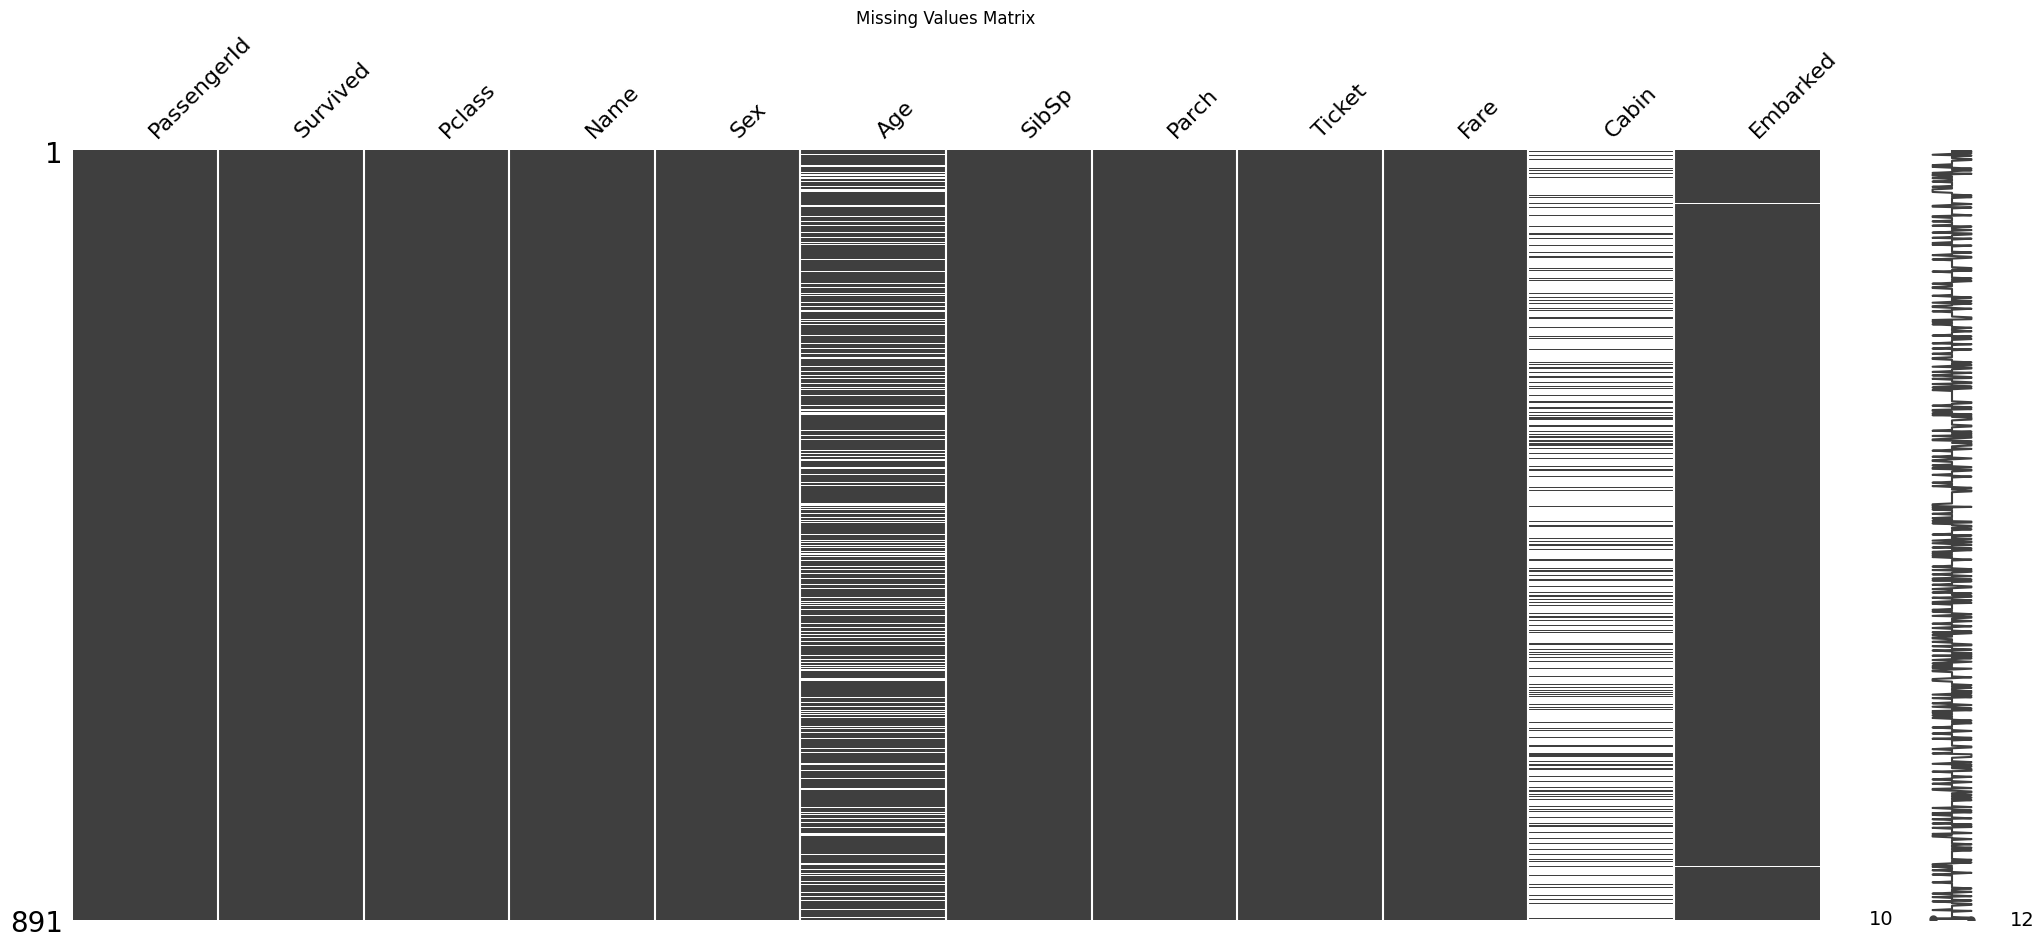

In [141]:
# 2. Visualize missing values using missingno matrix
plt.figure(figsize=(10, 6))
msno.matrix(training)
plt.title('Missing Values Matrix')
plt.show()

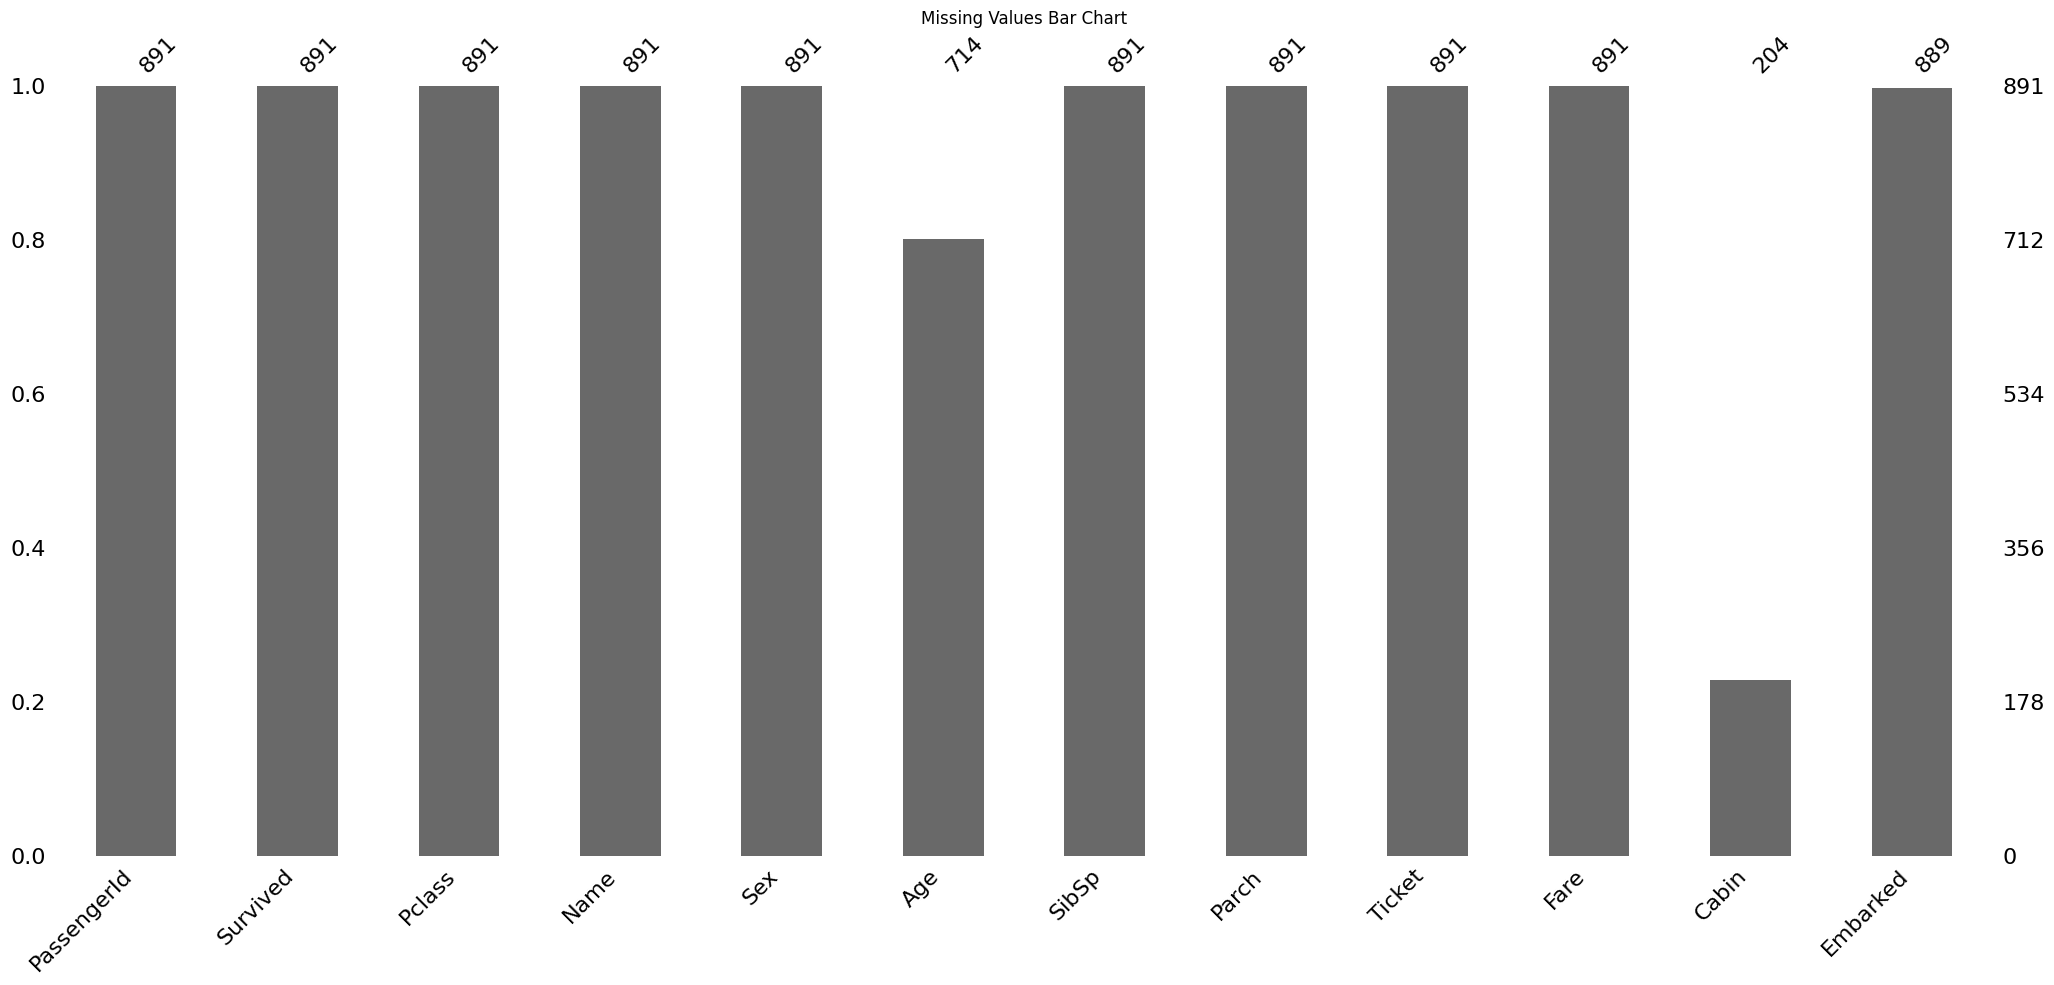

In [142]:
# 3. Visualize missing values using missingno bar
plt.figure(figsize=(10, 6))
msno.bar(training)
plt.title('Missing Values Bar Chart')
plt.show()

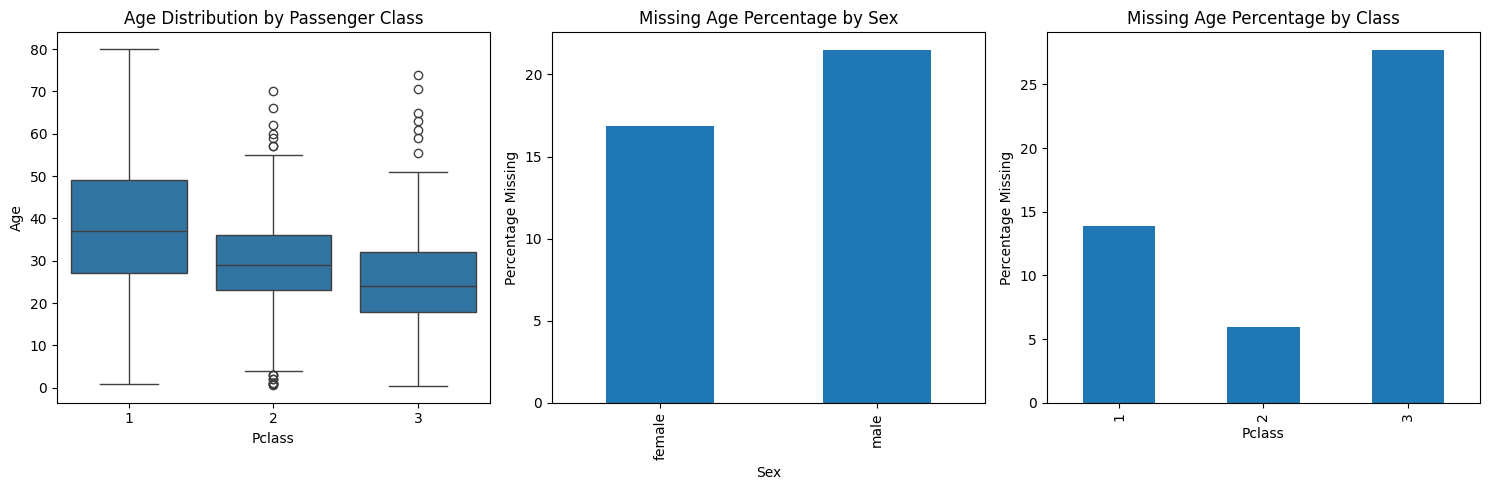

In [143]:
# Missing Age Analysis
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.boxplot(x='Pclass', y='Age', data=training)
plt.title('Age Distribution by Passenger Class')

# Missing Age by Sex
plt.subplot(1, 3, 2)
missing_age_by_sex = training.groupby('Sex')['Age'].apply(lambda x: x.isnull().mean() * 100)
missing_age_by_sex.plot(kind='bar')
plt.title('Missing Age Percentage by Sex')
plt.ylabel('Percentage Missing')

# Missing Age by Passenger Class
plt.subplot(1, 3, 3)
missing_age_by_class = training.groupby('Pclass')['Age'].apply(lambda x: x.isnull().mean() * 100)
missing_age_by_class.plot(kind='bar')
plt.title('Missing Age Percentage by Class')
plt.ylabel('Percentage Missing')

plt.tight_layout()
plt.show()

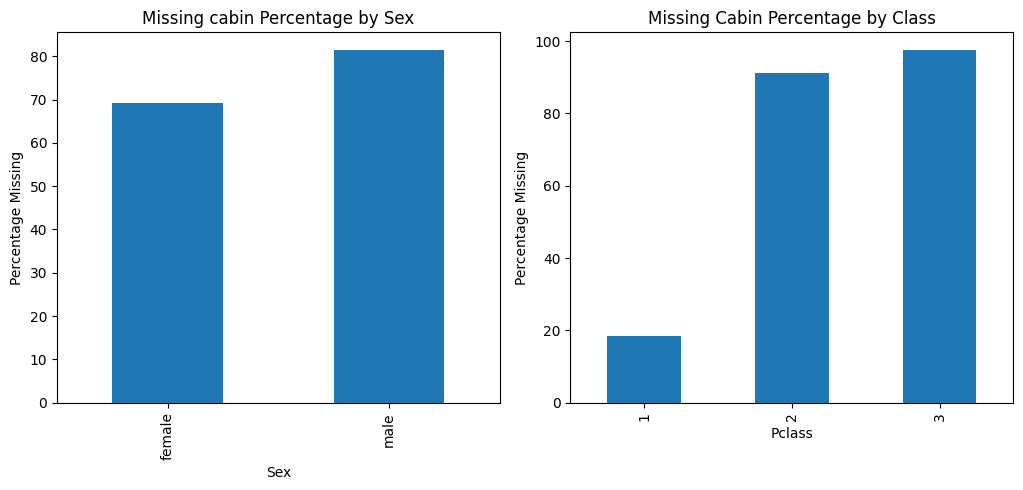

In [144]:
# Missing Cabin Analysis
plt.figure(figsize=(15, 5))

# Missing Cabin by Sex
plt.subplot(1, 3, 2)
missing_cabin_by_sex = training.groupby('Sex')['Cabin'].apply(lambda x: x.isnull().mean() * 100)
missing_cabin_by_sex.plot(kind='bar')
plt.title('Missing cabin Percentage by Sex')
plt.ylabel('Percentage Missing')

# Missing Cabin by Passenger Class
plt.subplot(1, 3, 3)
missing_cabin_by_class = training.groupby('Pclass')['Cabin'].apply(lambda x: x.isnull().mean() * 100)
missing_cabin_by_class.plot(kind='bar')
plt.title('Missing Cabin Percentage by Class')
plt.ylabel('Percentage Missing')

plt.tight_layout()
plt.show()

#### Embark Analysis

In [145]:
training[training['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


They have the same ticket number and the same cabin number. Let's check if there are any other passengers with the same ticket number and cabin number.

In [146]:
training.query('Ticket == "113572" and Cabin == "B28"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


- They're the only ones with the same ticket number and cabin number. 
- They're not family members. 
- They both survived.
- Question : where did they embark from?

In [147]:
# Find passengers with fare around 80.0
training.query('Fare >= 79.0 and Fare <= 81.0')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.00,B28,NaN
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.20,B86,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.20,NaN,C
262,263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.65,E67,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.65,E67,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.65,E68,S
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.0,1,1,13567,79.20,B41,C
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.20,B82 B84,C
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.00,B28,NaN


With such fare, they're not likely to be from the same city. Check on 11 tickets as 2 first ticket numbers.

Additional infos: cabin doesn't relate to the fare.
Person with missing age can't be easily deleted as they're not outliers.

In [148]:
training.query('Ticket.str.startswith("113")', engine='python')[
    ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Survived']
].sort_values('Ticket')

,PassengerId,Name,Ticket,Fare,Cabin,Embarked,Pclass,Survived
711,712,"Klaber, Mr. Herman",113028,26.5500,C124,S,1,0
331,332,"Partner, Mr. Austen",113043,28.5000,C124,S,1,0
536,537,"Butt, Major. Archibald Willingham",113050,26.5500,B38,S,1,0
452,453,"Foreman, Mr. Benjamin Laventall",113051,27.7500,C111,C,1,0
857,858,"Daly, Mr. Peter Denis",113055,26.5500,E17,S,1,1
284,285,"Smith, Mr. Richard William",113056,26.0000,A19,S,1,0
83,84,"Carrau, Mr. Francisco M",113059,47.1000,NaN,S,1,0
782,783,"Long, Mr. Milton Clyde",113501,30.0000,D6,S,1,0
377,378,"Widener, Mr. Harry Elkins",113503,211.5000,C82,C,1,0
166,167,"Chibnall, Mrs. (Edith Martha Bowerman)",113505,55.0000,E33,S,1,1


In [149]:
training.query('Ticket.str.startswith("113")', engine='python')[
    ['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Pclass', 'Survived']
].value_counts('Embarked')

Embarked
S    41
C     4
Name: count, dtype: int64

- We deduct that the 2 passengers with fare around 80.0 are from Southampton.
- They are not family members but they could be friends.

MISSING VALUES EMBARKED DONE! Use Southampton for the 2 passengers.

In [150]:
training.loc[training['Embarked'].isnull(), 'Embarked'] = 'S'


In [151]:
training.query('Ticket == "113572" and Cabin == "B28"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


#### Age Analysis

In [152]:
training[training.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [153]:
training[training.Age.isnull()].sort_values('SibSp', ascending=False).head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.5500,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S


Why is by SibSp 8 I only see 7 passengers?

In [154]:
training.query('SibSp == 8')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [155]:
training.loc[training['SibSp'] == 8, 'SibSp'] = 5
training.loc[training['SibSp'] == 8, 'Parch'] = 1

In [156]:
training.query('Ticket == "CA. 2343"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,5,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,5,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,5,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,5,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,5,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,5,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,5,2,CA. 2343,69.55,NaN,S


In [157]:
training.query('Name.str.contains("Master. Thomas Henry")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,5,2,CA. 2343,69.55,NaN,S


In [158]:
# Modify both SibSp and Parch values
training.loc[training['Name'].str.contains('Master. Thomas Henry'), ['SibSp', 'Parch']] = [0, 6]


In [159]:
training.query('Ticket == "CA. 2343"')
#wrong patch

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,0,6,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,5,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,5,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,5,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,5,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,5,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,5,2,CA. 2343,69.55,NaN,S


In [160]:
# Modify Parch values - set to 1 for everyone except Master Thomas Henry
training.loc[(training['Ticket'] == 'CA. 2343') & 
            (~training['Name'].str.contains('Master. Thomas Henry')), 'Parch'] = 1


In [161]:
training.query('Ticket == "CA. 2343"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,0,6,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,5,1,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,5,1,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,5,1,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,5,1,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,5,1,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,5,1,CA. 2343,69.55,NaN,S


In [162]:
# 1. Find passengers with both Age and Cabin missing
training.query('Age.isnull() and Cabin.isnull()')[
    ['PassengerId', 'Name', 'Pclass', 'Age', 'Cabin', 'Fare', 'Ticket']
]


,PassengerId,Name,Pclass,Age,Cabin,Fare,Ticket
5,6,"Moran, Mr. James",3,NaN,NaN,8.4583,330877
17,18,"Williams, Mr. Charles Eugene",2,NaN,NaN,13.0000,244373
19,20,"Masselmani, Mrs. Fatima",3,NaN,NaN,7.2250,2649
26,27,"Emir, Mr. Farred Chehab",3,NaN,NaN,7.2250,2631
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",3,NaN,NaN,7.8792,330959
...,...,...,...,...,...,...,...
859,860,"Razi, Mr. Raihed",3,NaN,NaN,7.2292,2629
863,864,"Sage, Miss. Dorothy Edith ""Dolly""",3,NaN,NaN,69.5500,CA. 2343
868,869,"van Melkebeke, Mr. Philemon",3,NaN,NaN,9.5000,345777
878,879,"Laleff, Mr. Kristo",3,NaN,NaN,7.8958,349217


In [163]:
training.query('Age.isnull() and Cabin.isnull()')[
    ['PassengerId', 'Name', 'Pclass', 'Age', 'Cabin', 'Fare', 'Ticket']
].Pclass.value_counts()

Pclass
3    134
1     14
2     10
Name: count, dtype: int64

In [164]:
# Find all passengers with 'Mrs' in their names
training.query('Name.str.contains("Mrs")' , engine='python')[
    ['PassengerId', 'Name', 'Age', 'Pclass', 'SibSp', 'Parch', 'Survived']
].sort_values('Age')

,PassengerId,Name,Age,Pclass,SibSp,Parch,Survived
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,2,1,0,1
830,831,"Yasbeck, Mrs. Antoni (Selini Alexander)",15.0,3,1,0,1
307,308,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,1,0,1
781,782,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,1,0,1
700,701,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,1,0,1
...,...,...,...,...,...,...,...
457,458,"Kenyon, Mrs. Frederick R (Marion)",NaN,1,1,0,1
533,534,"Peter, Mrs. Catherine (Catherine Rizk)",NaN,3,0,2,1
578,579,"Caram, Mrs. Joseph (Maria Elias)",NaN,3,1,0,0
669,670,"Taylor, Mrs. Elmer Zebley (Juliet Cummins Wright)",NaN,1,1,0,1


In [165]:
training.query('Name.str.contains("Mrs")' , engine='python')[
    ['PassengerId', 'Name', 'Age', 'Pclass', 'SibSp', 'Parch', 'Survived']
].sort_values('Age').describe()

,PassengerId,Age,Pclass,SibSp,Parch,Survived
count,129.000000,112.000000,129.000000,129.000000,129.000000,129.000000
mean,453.806202,35.642857,1.984496,0.682171,0.806202,0.790698
std,268.570873,11.506251,0.819532,0.599277,1.262918,0.408397
min,2.000000,14.000000,1.000000,0.000000,0.000000,0.000000
25%,255.000000,27.000000,1.000000,0.000000,0.000000,1.000000
50%,438.000000,35.000000,2.000000,1.000000,0.000000,1.000000
75%,679.000000,44.000000,3.000000,1.000000,1.000000,1.000000
max,886.000000,63.000000,3.000000,3.000000,6.000000,1.000000


- Investigate the age of Mrs, why is there below 20?
- Decide to insert the age of mrs with the mean 35.642857

In [166]:
training.query('Name.str.contains("Mrs") and Age < 25' , engine='python')[
    ['PassengerId', 'Name', 'Age', 'Pclass', 'SibSp', 'Parch', 'Survived']
].sort_values('Age')

,PassengerId,Name,Age,Pclass,SibSp,Parch,Survived
9,10,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,2,1,0,1
830,831,"Yasbeck, Mrs. Antoni (Selini Alexander)",15.0,3,1,0,1
781,782,"Dick, Mrs. Albert Adrian (Vera Gillespie)",17.0,1,1,0,1
307,308,"Penasco y Castellana, Mrs. Victor de Satode (M...",17.0,1,1,0,1
49,50,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",18.0,3,1,0,0
700,701,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",18.0,1,1,0,1
855,856,"Aks, Mrs. Sam (Leah Rosen)",18.0,3,0,1,1
546,547,"Beane, Mrs. Edward (Ethel Clarke)",19.0,2,1,0,1
427,428,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",19.0,2,0,0,1
291,292,"Bishop, Mrs. Dickinson H (Helen Walton)",19.0,1,1,0,1


In [167]:
training.query('Name.str.contains("Nasser")' , engine='python').sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
122,123,0,2,"Nasser, Mr. Nicholas",male,32.5,1,0,237736,30.0708,NaN,C


They are husband and wife.

In [168]:
# Find all passengers with 'Miss' in their names
training.query('Name.str.contains("Miss")' , engine='python')[
    ['PassengerId', 'Name', 'Age', 'Pclass', 'SibSp', 'Parch', 'Survived']
].sort_values('Age')

,PassengerId,Name,Age,Pclass,SibSp,Parch,Survived
644,645,"Baclini, Miss. Eugenie",0.75,3,2,1,1
469,470,"Baclini, Miss. Helene Barbara",0.75,3,2,1,1
381,382,"Nakid, Miss. Maria (""Mary"")",1.00,3,0,2,1
172,173,"Johnson, Miss. Eleanor Ileen",1.00,3,1,1,1
205,206,"Strom, Miss. Telma Matilda",2.00,3,0,1,0
...,...,...,...,...,...,...,...
697,698,"Mullens, Miss. Katherine ""Katie""",NaN,3,0,0,1
727,728,"Mannion, Miss. Margareth",NaN,3,0,0,1
792,793,"Sage, Miss. Stella Anna",NaN,3,5,1,0
863,864,"Sage, Miss. Dorothy Edith ""Dolly""",NaN,3,5,1,0


In [169]:
training.query('Name.str.contains("Miss")' , engine='python')[
    ['PassengerId', 'Name', 'Age', 'Pclass', 'SibSp', 'Parch', 'Survived']
].sort_values('Age').describe()

,PassengerId,Age,Pclass,SibSp,Parch,Survived
count,182.000000,146.000000,182.000000,182.000000,182.000000,182.000000
mean,408.884615,21.773973,2.307692,0.664835,0.532967,0.697802
std,246.775812,12.990292,0.849989,1.213540,0.784174,0.460477
min,3.000000,0.750000,1.000000,0.000000,0.000000,0.000000
25%,213.000000,14.125000,1.250000,0.000000,0.000000,0.000000
50%,381.500000,21.000000,3.000000,0.000000,0.000000,1.000000
75%,612.250000,30.000000,3.000000,1.000000,1.000000,1.000000
max,889.000000,63.000000,3.000000,5.000000,2.000000,1.000000


Miss has maximal age of 63. Could it be a typo?

In [170]:
training.query('Name.str.contains("Miss") and Age > 30', engine='python').sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,NaN,Q
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
218,219,1,1,"Bazzani, Miss. Albina",female,32.0,0,0,11813,76.2917,D15,C
123,124,1,2,"Webber, Miss. Susan",female,32.5,0,0,27267,13.0000,E101,S
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
576,577,1,2,"Garside, Miss. Ethel",female,34.0,0,0,243880,13.0000,NaN,S
269,270,1,1,"Bissette, Miss. Amelia",female,35.0,0,0,PC 17760,135.6333,C99,S
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S


In [171]:
training.query('Ticket == "36928"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [172]:
training.query('Fare == 164.8667')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [173]:
training.query('Name.str.contains("Wick")' , engine='python')
#Wrong Parch and SibSp

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S


In [174]:
training.loc[training['Ticket'] == '36928', ['SibSp', 'Parch']] = [0, 1]

In [175]:
training.query('Name.str.contains("Wick")' , engine='python')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,1,36928,164.8667,C7,S
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,0,1,36928,164.8667,NaN,S


In [176]:
training.query('Name.str.contains("Andrews") or Name.str.contains("Hogeboom")', engine='python')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
765,766,1,1,"Hogeboom, Mrs. John C (Anna Andrews)",female,51.0,1,0,13502,77.9583,D11,S
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0000,A36,S


- Inspect Andrews, Mr. Thomas Jr?? Why the fare is 0?
- Anna and Kornelia are siblings. However Anna married and Kornelia hasn't yet

In [177]:
training.query('Name.str.contains("Eustis")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C


Investigate Compton, Miss. Sara Rebecca	, Crosby, Miss. Harriet R, Minahan, Miss. Daisy E, Newell, Miss. Madeleine	

In [178]:
training.query('Name.str.contains("Compton") or Name.str.contains("Crosby") or Name.str.contains("Minahan") or Name.str.contains("Newell")').sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.2750,D36,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S


In [179]:
training.query('Ticket == "PC 17756"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,1,1,PC 17756,83.1583,E49,C


In [180]:
training.query('Ticket == "WE/P 5735"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


In [181]:
training.query('Fare == 71.0')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0,B22,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0,B22,S


In [182]:
training.loc[training['Ticket'] == '19928', ['SibSp', 'Parch']] = [1, 0]
training.loc[(training['Ticket'] == '35273') & (training['Name'].str.contains("Miss")), 'Parch'] = 1
training.loc[training['Ticket'] == 'PC 17756', ['SibSp', 'Parch']] = [0, 0]
training.loc[training['Ticket'] == 'WE/P 5735', ['SibSp', 'Parch']] = [0, 1]

In [183]:
training.query('Name.str.contains("Compton") or Name.str.contains("Crosby") or Name.str.contains("Minahan") or Name.str.contains("Newell")').sort_values('Ticket')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
245,246,0,1,"Minahan, Dr. William Edward",male,44.0,1,0,19928,90.0000,C78,Q
412,413,1,1,"Minahan, Miss. Daisy E",female,33.0,1,0,19928,90.0000,C78,Q
215,216,1,1,"Newell, Miss. Madeleine",female,31.0,1,1,35273,113.2750,D36,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,1,35273,113.2750,D36,C
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
835,836,1,1,"Compton, Miss. Sara Rebecca",female,39.0,0,0,PC 17756,83.1583,E49,C
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,1,WE/P 5735,71.0000,B22,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,0,1,WE/P 5735,71.0000,B22,S


In [184]:
training.query('Ticket == "112050"') #Is there anything like promotion code ?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
806,807,0,1,"Andrews, Mr. Thomas Jr",male,39.0,0,0,112050,0.0,A36,S


In [185]:
training.query('Ticket == "392091"').sort_values('Age')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.35,NaN,S


Let's change the parch to 0, because she is just alone.

In [186]:
training.loc[training['Ticket'] == '392091', 'Parch'] = 0

In [187]:
training.query('Name.str.contains("Aks")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,0,392091,9.35,NaN,S


In [188]:
training.query('Name.str.contains("Eustis")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,D20,C


Fix the SIbSp and Parch typo for people who travel alone but written has SibSp or Parch

In [198]:
# Filter for passengers with non-zero SibSp or Parch
alone_passenger = training[(training['SibSp'] == 0) & (training['Parch'] == 0)]

alone_passenger.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,539.000000,539.000000,539.000000,406.000000,539.0,539.0,539.000000
mean,459.439703,0.306122,2.398887,32.201970,0.0,0.0,21.335496
std,256.329071,0.461309,0.805695,12.891756,0.0,0.0,42.232417
min,3.000000,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,235.500000,0.000000,2.000000,22.000000,0.0,0.0,7.775000
50%,467.000000,0.000000,3.000000,29.500000,0.0,0.0,8.158300
75%,682.500000,1.000000,3.000000,39.000000,0.0,0.0,15.022900
max,891.000000,1.000000,3.000000,80.000000,0.0,0.0,512.329200


In [223]:
# Extract last names
alone_passenger['LastName'] = alone_passenger['Name'].apply(lambda x: x.split(',')[0].strip())
alone_passenger

/var/folders/ps/dds46n757px34v68dmvm_dyr0000gn/T/ipykernel_1120/2009009019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alone_passenger['LastName'] = alone_passenger['Name'].apply(lambda x: x.split(',')[0].strip())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Moran
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,McCarthy
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Bonnell
...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,Sutehall
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Montvila
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Graham
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Behr


In [224]:
alone_passenger.query('Name.str.contains("Eustis")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName


In [227]:
# Group by LastName and count occurrences
duplicate_last_names = alone_passenger.groupby(['LastName', 'Ticket']).size().reset_index(name='Count')

duplicate_last_names.sort_values('Ticket')


# Step 2: Filter for duplicates (Count > 1)
#duplicates = duplicate_last_names[duplicate_last_names['Count'] > 1]

# Display the results
#print(duplicates)


,LastName,Ticket,Count
418,Rothes,110152,1
290,Maioni,110152,1
85,Cherry,110152,1
398,Porter,110465,1
89,Clifford,110465,1
...,...,...,...
312,Mellors,SW/PP 751,1
407,Ridsdale,W./C. 14258,1
94,Coleridge,W./C. 14263,1
182,Harknett,W./C. 6609,1


Count means how many people use it

In [226]:
# Step 4: Filter for duplicates (Count > 1)
duplicates = duplicate_last_names[duplicate_last_names['Count'] > 1]

duplicates
# Display the results
#print(duplicates)

,LastName,Ticket,Count
231,Johnson,LINE,2
257,Lam,1601,2


In [228]:
training.query('Name.str.contains("Johnson")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


Considering to delete Johnson family since the ticket is not number and fare is 0, SibSp and Parch is also wrongly inputed

In [229]:
training.query('Ticket == "LINE"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S


Decided not to delete it since the entry with the ticket "LINE" is associated with a survivor

In [230]:
training.loc[(training['Ticket'] == 'LINE') & (training['Name'].str.contains("Johnson")), 'Parch'] = 1

In [231]:
training.query('Ticket == "LINE"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,1,LINE,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,1,LINE,0.0,NaN,S


In [244]:
training.query('Name.str.contains("Johnson")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
172,173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.0,1,1,347742,11.1333,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,1,LINE,0.0000,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,1,LINE,0.0000,NaN,S
719,720,0,3,"Johnson, Mr. Malkolm Joackim",male,33.0,0,0,347062,7.7750,NaN,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


In [233]:
training.query('Name.str.contains("Lam")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S


Mrs Appleton?

In [234]:
training.query('Ticket == "11769"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S


In [235]:
training.query('Ticket == "1601"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


They are all have chinese names so they might be friends and not related with blood

In [236]:
training.loc[(training['Ticket'] == '11769'), 'SibSp'] = 0

In [237]:
training.query('Ticket == "11769"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
571,572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,0,0,11769,51.4792,C101,S


NOW ALL THE ALONE TRAVELLER'S SIBSP AND PARCH ARE ALL TRUE,

! Now check on the with-family-traveller or with-friend-traveller 

In [218]:
training.query('Name.str.contains("Brown")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,1,29750,39.0000,NaN,S
684,685,0,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S


In [241]:
training.query('Name.str.contains("Goldsmith")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
165,166,1,3,"Goldsmith, Master. Frank John William ""Frankie""",male,9.0,0,2,363291,20.525,NaN,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.525,NaN,S
548,549,0,3,"Goldsmith, Mr. Frank John",male,33.0,1,1,363291,20.525,NaN,S


In [239]:
training.query('Ticket == "29750"').Name

670    Brown, Mrs. Thomas William Solomon (Elizabeth ...
684                    Brown, Mr. Thomas William Solomon
Name: Name, dtype: object

In [240]:
training.query('Name.str.contains("Ford")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.375,NaN,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S
436,437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,NaN,S
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,40.0,1,0,29750,39.000,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",female,48.0,1,3,W./C. 6608,34.375,NaN,S


In [238]:
training.loc[(training['Ticket'] == '29750'), 'Parch'] = 0

In [127]:
training.query('Ticket == "A/5 21171"')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


After checking, it's true that those are outliers

In [128]:
# Step 2: Update SibSp and Parch to 0 for unique passengers
training.loc[training['Name'].isin(unique_passengers['Name']), 'SibSp'] = 0
training.loc[training['Name'].isin(unique_passengers['Name']), 'Parch'] = 0

In [129]:
# Verify the changes
training[training['Name'].isin(unique_passengers['Name'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,0,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,0,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,0,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,0,0,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,0,347742,11.1333,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,0,0,P/PP 3381,24.0000,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,0,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,0,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,0,382652,29.1250,NaN,Q


In [131]:
training.query('Name.str.contains("Eustis")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,0,0,36947,78.2667,D20,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,0,0,36947,78.2667,D20,C


In [67]:
# Step 1: Group by Name and calculate the sum of SibSp and Parch
grouped_passengers = training.groupby('Name').agg({'SibSp': 'sum', 'Parch': 'sum'}).reset_index()

# Step 2: Check the condition
# Create a new column to check if the condition is satisfied
grouped_passengers['Condition_Satisfied'] = grouped_passengers['SibSp'] == (grouped_passengers['Parch'] + 1)

grouped_passengers

# Step 3: Filter those who do not satisfy the condition
#unsatisfied_passengers = grouped_passengers[~grouped_passengers['Condition_Satisfied']]

# Display the results
#print(unsatisfied_passengers[['Name', 'SibSp', 'Parch']])

,Name,SibSp,Parch,Condition_Satisfied
0,"Abbing, Mr. Anthony",0,0,False
1,"Abbott, Mr. Rossmore Edward",0,0,False
2,"Abbott, Mrs. Stanton (Rosa Hunt)",0,0,False
3,"Abelson, Mr. Samuel",0,0,False
4,"Abelson, Mrs. Samuel (Hannah Wizosky)",0,0,False
...,...,...,...,...
886,"de Mulder, Mr. Theodore",0,0,False
887,"de Pelsmaeker, Mr. Alfons",0,0,False
888,"del Carlo, Mr. Sebastiano",0,0,False
889,"van Billiard, Mr. Austin Blyler",0,0,False


In [69]:
training.query('Name.str.contains("Eustis")')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,0,0,36947,78.2667,D20,C
591,592,1,1,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,0,0,36947,78.2667,D20,C


In [98]:
training.query('Age.isnull() and Cabin.notnull()')#.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.0000,E33,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,A32,S
284,285,0,1,"Smith, Mr. Richard William",male,NaN,0,0,113056,26.0000,A19,S
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,C106,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
351,352,0,1,"Williams-Lambert, Mr. Fletcher Fellows",male,NaN,0,0,113510,35.0000,C128,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S


In [54]:
# First, let's look at tickets that are shared by multiple passengers
# Get ticket counts
ticket_counts = training['Ticket'].value_counts()


Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [61]:
# Show tickets that appear more than once
shared_tickets = ticket_counts[ticket_counts > 1]
shared_tickets.sort_values(ascending=False)

Ticket
347082      7
1601        7
CA. 2343    7
3101295     6
CA 2144     6
           ..
111361      2
113806      2
367226      2
2699        2
349237      2
Name: count, Length: 134, dtype: int64

In [56]:
# Let's look at one example of shared ticket
# Replace 'TICKET_NUMBER' with one of the shared ticket numbers we found
example_ticket = shared_tickets.index[0]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.275,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.275,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.275,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.275,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.275,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.275,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.275,NaN,S


In [63]:
example_ticket = shared_tickets.index[1]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [88]:
training.query('Ticket == "CA. 2343"') 
# Should I delete this ticket? No! Correct the SibSp to 5 Parch 1, and change the Master. Thomas Henry to 6 Parch, SibSp 0.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [64]:
example_ticket = shared_tickets.index[2]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S
643,644,1,3,"Foo, Mr. Choong",male,NaN,0,0,1601,56.4958,NaN,S
692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S


In [65]:
example_ticket = shared_tickets.index[3]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
50,51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
266,267,0,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S
824,825,0,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S


In [80]:
example_ticket = shared_tickets.index[4]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [81]:
example_ticket = shared_tickets.index[5]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
63,64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.9,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.9,NaN,S
634,635,0,3,"Skoog, Miss. Mabel",female,9.0,3,2,347088,27.9,NaN,S
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9,NaN,S


In [82]:
example_ticket = shared_tickets.index[6]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,NaN,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,NaN,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,NaN,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,NaN,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,NaN,S


In [83]:
example_ticket = shared_tickets.index[7]  # taking first shared ticket as example
training[training['Ticket'] == example_ticket]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.125,NaN,Q
171,172,0,3,"Rice, Master. Arthur",male,4.0,4,1,382652,29.125,NaN,Q
278,279,0,3,"Rice, Master. Eric",male,7.0,4,1,382652,29.125,NaN,Q
787,788,0,3,"Rice, Master. George Hugh",male,8.0,4,1,382652,29.125,NaN,Q
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.125,NaN,Q


In [36]:
# Survival Rate Analysis
print("=== Survival Analysis ===")

# Overall Survival Statistics
total_passengers = len(training)
survivors = training['Survived'].sum()
deaths = total_passengers - survivors

print(f"Total Passengers: {total_passengers}")
print(f"Total Survivors: {survivors} ({(survivors/total_passengers * 100).round(2)}%)")
print(f"Total Deaths: {deaths} ({(deaths/total_passengers * 100).round(2)}%)")


=== Survival Analysis ===
Total Passengers: 891
Total Survivors: 342 (38.38%)
Total Deaths: 549 (61.62%)


In [37]:
# Survival by Gender
print("\n=== Survival by Gender ===")
gender_survival = pd.crosstab(training['Sex'], training['Survived'])
gender_survival.columns = ['Died', 'Survived']
gender_survival['Total'] = gender_survival['Died'] + gender_survival['Survived']
gender_survival['Survival Rate'] = (gender_survival['Survived'] / gender_survival['Total'] * 100).round(2)
print(gender_survival)


=== Survival by Gender ===
        Died  Survived  Total  Survival Rate
Sex                                         
female    81       233    314          74.20
male     468       109    577          18.89


In [38]:
# Survival by Class
print("\n=== Survival by Passenger Class ===")
class_survival = pd.crosstab(training['Pclass'], training['Survived'])
class_survival.columns = ['Died', 'Survived']
class_survival['Total'] = class_survival['Died'] + class_survival['Survived']
class_survival['Survival Rate'] = (class_survival['Survived'] / class_survival['Total'] * 100).round(2)
print(class_survival)


=== Survival by Passenger Class ===
        Died  Survived  Total  Survival Rate
Pclass                                      
1         80       136    216          62.96
2         97        87    184          47.28
3        372       119    491          24.24


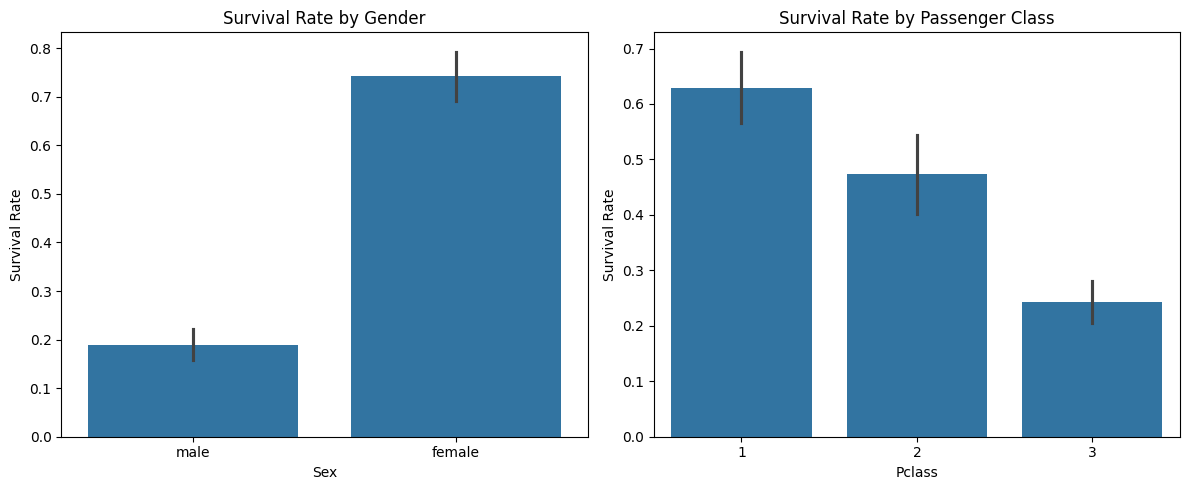

In [39]:
# Optional: Add visualization
plt.figure(figsize=(12, 5))

# Gender survival plot
plt.subplot(1, 2, 1)
sns.barplot(data=training, x='Sex', y='Survived')
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')

# Class survival plot
plt.subplot(1, 2, 2)
sns.barplot(data=training, x='Pclass', y='Survived')
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')

plt.tight_layout()
plt.show()

In [8]:
testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [14]:
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
